# Titanic Survival Model

## Requirements


pandas, pathlib, sklearn

In [ ]:
# TODO reduce noise in age and other factors that are broad range

## Imports

In [164]:
import pandas as pd
import pathlib
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import matthews_corrcoef, accuracy_score, ConfusionMatrixDisplay


## Preprocessing

In [165]:
path = pathlib.Path("exercises_09.ipynb").resolve().parent.parent.parent / "data" / "titanic_train.csv"
training_data = pd.read_csv(path)

Sex has to be converted to number like object and embarked also has to be changed.

In [166]:
training_data["numeric_sex"] = training_data["Sex"].apply(lambda sex: 0 if sex == "male" else 1 if sex == "female" else 0)
training_data["numeric_embarked"] = training_data["Embarked"].apply(lambda port:{"C":0, "Q":1, "S":2,}.get(port,0))

feature_index = [12, 2, 6, 9, 7]
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       757 non-null    int64  
 1   Survived          757 non-null    int64  
 2   Pclass            757 non-null    int64  
 3   Name              757 non-null    object 
 4   Sex               757 non-null    object 
 5   Age               607 non-null    float64
 6   SibSp             757 non-null    int64  
 7   Parch             757 non-null    int64  
 8   Ticket            757 non-null    object 
 9   Fare              757 non-null    float64
 10  Cabin             170 non-null    object 
 11  Embarked          755 non-null    object 
 12  numeric_sex       757 non-null    int64  
 13  numeric_embarked  757 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 82.9+ KB


## Training
Features are Sex, Embarked, Class and Fare.


In [167]:
x = training_data.iloc[:,feature_index] 
y = training_data[['Survived']]

param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 50, 75, 100],
    'min_samples_split':  [2, 10, 50, 75, 100]
}
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, n_jobs=-1, cv=5, scoring='matthews_corrcoef', verbose=1)



In [168]:
grid.fit(x, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20, 30, 50, 75, 100],
                         'min_samples_split': [2, 10, 50, 75, 100]},
             scoring='matthews_corrcoef', verbose=1)

In [169]:
grid.best_score_

0.5791126914243457

In [170]:
grid.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [171]:
best_tree = grid.best_estimator_
y_pred = best_tree.predict(x)


## Analysis

In [172]:
matthews_corrcoef(y, y_pred)

0.6175291344805274

In [173]:
accuracy_score(y, y_pred)

0.821664464993395

In [174]:
training_data['predictions'] = y_pred
false = training_data.loc[training_data['predictions'] != training_data["Survived"]][training_data.columns[[1]+feature_index]]
false.head()


,Survived,numeric_sex,Pclass,SibSp,Fare,Parch
1,1,0,1,0,26.5500,0
15,0,1,3,0,14.4583,0
20,1,0,3,0,7.8542,0
33,0,1,3,1,15.2458,1
41,0,1,3,1,17.8000,0


## Testing the model

In [175]:
test_path = pathlib.Path("exercises_09.ipynb").resolve().parent.parent.parent / "data" / "titanic_test.csv"
testing_data = pd.read_csv(test_path)

In [176]:
testing_data["numeric_sex"] = testing_data["Sex"].apply(lambda sex: 0 if sex == "male" else 1 if sex == "female" else None)
testing_data["numeric_embarked"] = testing_data["Embarked"].apply(lambda port:{"C":0, "Q":1, "S":2,}.get(port,0))


In [177]:
x_test = testing_data.iloc[:,feature_index] 
y_test = testing_data[['Survived']]

In [178]:
y_pred_test = best_tree.predict(x_test)

In [179]:
matthews_corrcoef(y_test, y_pred_test)

0.6063937304332403

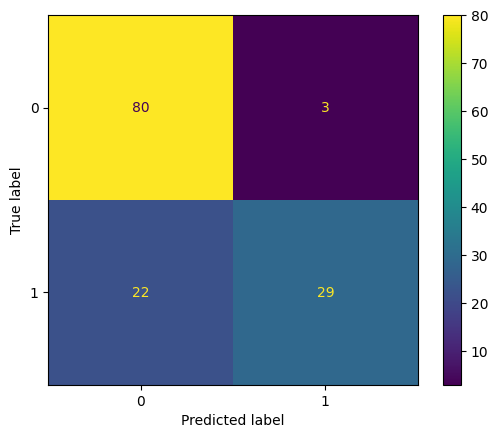

In [180]:
ConfusionMatrixDisplay.from_estimator(best_tree, x_test, y_test) 